In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
 
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression
from sklearn.kernel_ridge import KernelRidge

In [2]:
df=pd.read_csv('Energy_consumption.csv')
df1=pd.read_csv('base_station_basic_info.csv')
df2=pd.read_csv('Cell-level data.csv')

In [3]:
df.head()

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812


In [4]:
df1.head()

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,B_0,Cell0,Type1,Mode2,365.0,20,4,6.875934
1,B_1,Cell0,Type2,Mode2,532.0,20,4,6.875934
2,B_2,Cell0,Type1,Mode2,365.0,20,4,6.875934
3,B_3,Cell0,Type2,Mode2,532.0,20,4,6.875934
4,B_4,Cell0,Type2,Mode2,532.0,20,4,6.875934


In [5]:
df2.head()

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0


In [6]:
df1.head()

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,B_0,Cell0,Type1,Mode2,365.0,20,4,6.875934
1,B_1,Cell0,Type2,Mode2,532.0,20,4,6.875934
2,B_2,Cell0,Type1,Mode2,365.0,20,4,6.875934
3,B_3,Cell0,Type2,Mode2,532.0,20,4,6.875934
4,B_4,Cell0,Type2,Mode2,532.0,20,4,6.875934


In [7]:
Merged_df=pd.merge(df2,df, on=['BS','Time'], how='inner') 

In [8]:
data=pd.merge(Merged_df,df1, on=['BS','CellName'], how='inner')

In [9]:
data.columns

Index(['Time', 'BS', 'CellName', 'load', 'ESMode1', 'ESMode2', 'ESMode3',
       'ESMode4', 'ESMode5', 'ESMode6', 'Energy', 'RUType', 'Mode',
       'Frequency', 'Bandwidth', 'Antennas', 'TXpower'],
      dtype='object')

In [10]:
data.head()

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0,64.275037,Type1,Mode2,365.0,20,4,6.875934
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0,55.904335,Type1,Mode2,365.0,20,4,6.875934
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0,57.698057,Type1,Mode2,365.0,20,4,6.875934
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0,55.156951,Type1,Mode2,365.0,20,4,6.875934
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0,56.053812,Type1,Mode2,365.0,20,4,6.875934


In [11]:
data.isnull().sum()

Time         0
BS           0
CellName     0
load         0
ESMode1      0
ESMode2      0
ESMode3      0
ESMode4      0
ESMode5      0
ESMode6      0
Energy       0
RUType       0
Mode         0
Frequency    0
Bandwidth    0
Antennas     0
TXpower      0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98084 entries, 0 to 98083
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       98084 non-null  object 
 1   BS         98084 non-null  object 
 2   CellName   98084 non-null  object 
 3   load       98084 non-null  float64
 4   ESMode1    98084 non-null  float64
 5   ESMode2    98084 non-null  float64
 6   ESMode3    98084 non-null  float64
 7   ESMode4    98084 non-null  int64  
 8   ESMode5    98084 non-null  float64
 9   ESMode6    98084 non-null  float64
 10  Energy     98084 non-null  float64
 11  RUType     98084 non-null  object 
 12  Mode       98084 non-null  object 
 13  Frequency  98084 non-null  float64
 14  Bandwidth  98084 non-null  int64  
 15  Antennas   98084 non-null  int64  
 16  TXpower    98084 non-null  float64
dtypes: float64(9), int64(3), object(5)
memory usage: 13.5+ MB


In [13]:
data.columns

Index(['Time', 'BS', 'CellName', 'load', 'ESMode1', 'ESMode2', 'ESMode3',
       'ESMode4', 'ESMode5', 'ESMode6', 'Energy', 'RUType', 'Mode',
       'Frequency', 'Bandwidth', 'Antennas', 'TXpower'],
      dtype='object')

In [14]:
data.isna().sum()

Time         0
BS           0
CellName     0
load         0
ESMode1      0
ESMode2      0
ESMode3      0
ESMode4      0
ESMode5      0
ESMode6      0
Energy       0
RUType       0
Mode         0
Frequency    0
Bandwidth    0
Antennas     0
TXpower      0
dtype: int64

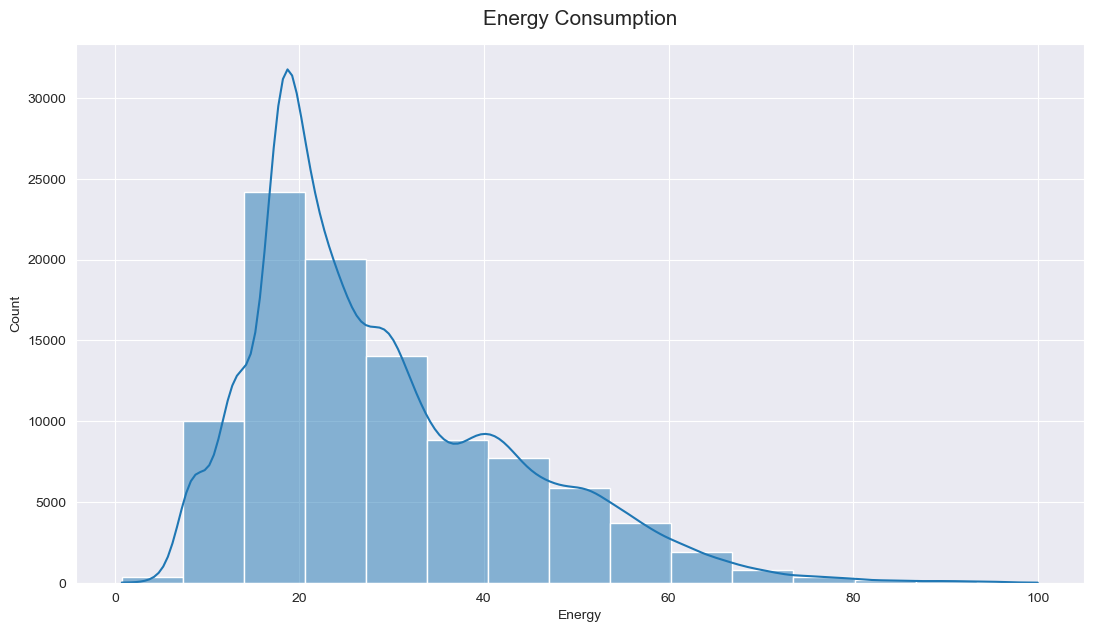

None

1.0069574035004967

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(data.Energy, kde = True, bins = 15)
plt.title('Energy Consumption', y = 1.02, fontsize = 15)
display(plt.show(), data.Energy.skew())

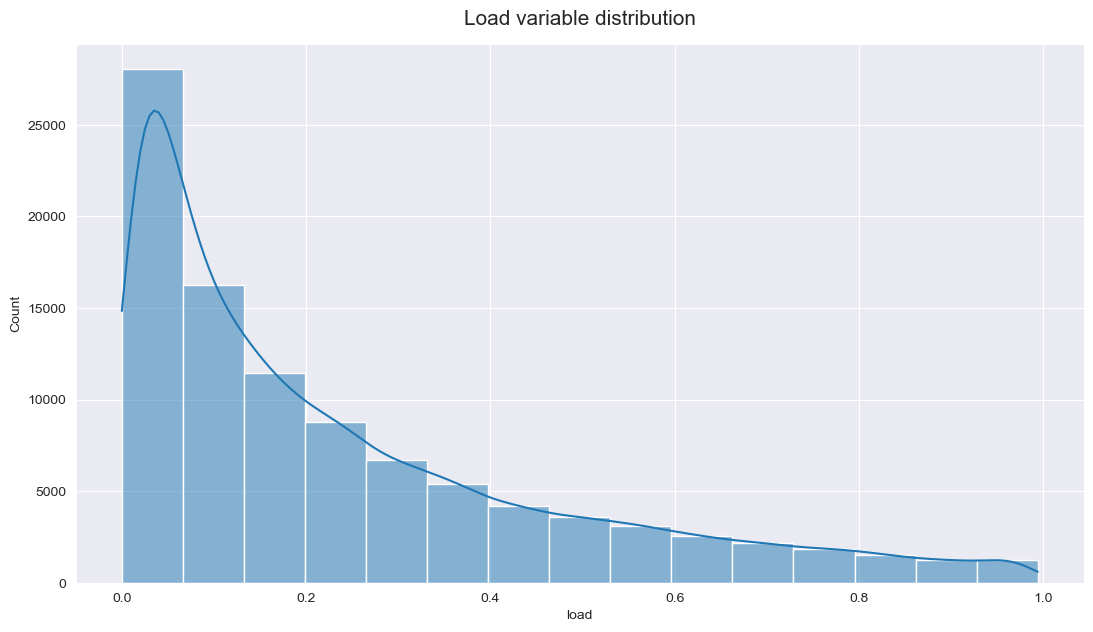

None

1.2306824286670044

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(data.load, kde = True, bins = 15)
plt.title('Load variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), data.load.skew())

<Axes: xlabel='CellName', ylabel='count'>

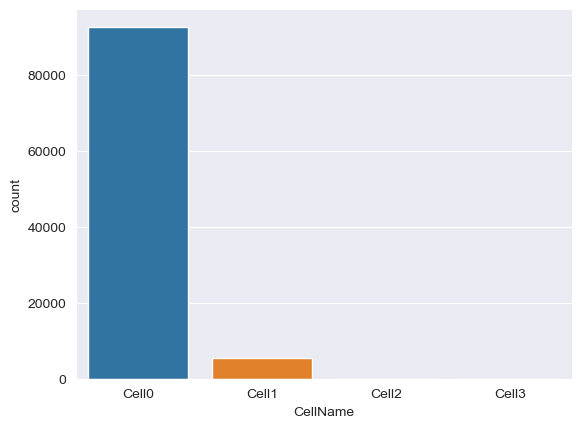

In [17]:
sns.countplot(x=data.CellName)

In [18]:
top20_corrs = abs(data.corr(numeric_only = True)).head(20)
top20_corrs

,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,Frequency,Bandwidth,Antennas,TXpower
load,1.000000,0.199395,0.197044,0.003215,NaN,0.004226,0.118115,0.594971,0.074309,0.266165,0.011319,0.090687
ESMode1,0.199395,1.000000,0.983995,0.007127,NaN,0.000924,0.039910,0.269606,0.257547,0.136718,0.044066,0.095990
ESMode2,0.197044,0.983995,1.000000,0.006994,NaN,0.000906,0.041663,0.267593,0.244546,0.146096,0.022223,0.065225
ESMode3,0.003215,0.007127,0.006994,1.000000,NaN,0.000155,0.007012,0.013684,0.005608,0.012386,0.010107,0.005939
ESMode4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESMode5,0.004226,0.000924,0.000906,0.000155,NaN,1.000000,0.000916,0.004684,0.005378,0.003213,0.004007,0.002100
ESMode6,0.118115,0.039910,0.041663,0.007012,NaN,0.000916,1.000000,0.120975,0.112794,0.485522,0.106464,0.426460
Energy,0.594971,0.269606,0.267593,0.013684,NaN,0.004684,0.120975,1.000000,0.033196,0.160808,0.165551,0.309092
Frequency,0.074309,0.257547,0.244546,0.005608,NaN,0.005378,0.112794,0.033196,1.000000,0.601493,0.185527,0.626580
Bandwidth,0.266165,0.136718,0.146096,0.012386,NaN,0.003213,0.485522,0.160808,0.601493,1.000000,0.043478,0.264248


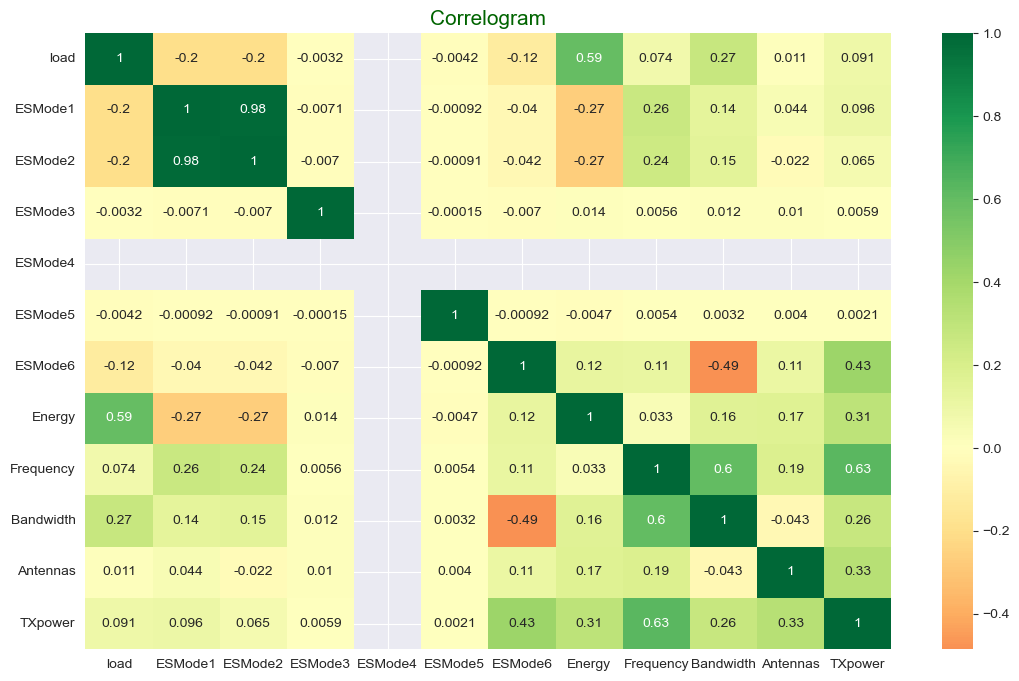

In [19]:
corr = data[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [20]:
#data['ESMode']=(data['ESMode1']+data['ESMode2']+data['ESMode3']+data['ESMode4']+data['ESMode5']+data['ESMode6'])/6

In [21]:
#data.drop(columns=['ESMode1', 'ESMode2', 'ESMode3',
       #'ESMode4', 'ESMode5', 'ESMode6'], axis=1, inplace=True)

In [22]:
BS_enc=LabelEncoder()
data['BS']=BS_enc.fit_transform(data['BS'])

In [23]:
t_enc=LabelEncoder()
data['Time']=t_enc.fit_transform(data['Time'])

In [24]:
cn_enc=LabelEncoder()
data['CellName']=cn_enc.fit_transform(data['CellName'])

In [25]:
ru_enc=LabelEncoder()
data['RUType']=ru_enc.fit_transform(data['RUType'])

In [26]:
m_enc=LabelEncoder()
data['Mode']=m_enc.fit_transform(data['Mode'])

In [27]:
X=data.drop(columns=['BS','Energy','RUType','Mode','ESMode1', 'ESMode2', 'ESMode3',
       'ESMode4', 'ESMode5', 'ESMode6'])
Y=data['Energy']

In [28]:
Seed=2023
np.random.seed(Seed)

In [29]:
models = {
          'random forest':RandomForestRegressor(random_state = Seed),
          'gradient boosting': GradientBoostingRegressor(random_state = Seed),
          'XGB':XGBRegressor(random_state = Seed),
          'CatBoost': CatBoostRegressor(random_seed = Seed ),
          'lasso regression': Lasso(random_state = Seed),
          'Bayesian Ridge': BayesianRidge()
          }

In [30]:
def cross_val_models(models, X, Y):
    
    cv_scores = [] #A list to store the mean performance of each model
    
    for name, model in models.items():
        cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2', ).mean()
        cv_scores.append(cv_score)

    score_df = pd.DataFrame([cv_scores], columns = list(models.keys())).transpose()
    score_df.rename(columns = {0:'CV_Score'}, inplace = True)

    return score_df.sort_values(by = 'CV_Score', ascending = False)

In [31]:
score_df = cross_val_models(models, X, Y)

Learning rate set to 0.081572
0:	learn: 13.1184909	total: 188ms	remaining: 3m 8s
1:	learn: 12.2616718	total: 202ms	remaining: 1m 40s
2:	learn: 11.4857622	total: 216ms	remaining: 1m 11s
3:	learn: 10.7904389	total: 228ms	remaining: 56.8s
4:	learn: 10.1625540	total: 240ms	remaining: 47.8s
5:	learn: 9.5998080	total: 255ms	remaining: 42.2s
6:	learn: 9.0650914	total: 270ms	remaining: 38.2s
7:	learn: 8.5797935	total: 284ms	remaining: 35.2s
8:	learn: 8.1431261	total: 298ms	remaining: 32.8s
9:	learn: 7.7627065	total: 311ms	remaining: 30.8s
10:	learn: 7.4214496	total: 324ms	remaining: 29.1s
11:	learn: 7.0971925	total: 339ms	remaining: 27.9s
12:	learn: 6.8084987	total: 352ms	remaining: 26.7s
13:	learn: 6.5596940	total: 365ms	remaining: 25.7s
14:	learn: 6.3235034	total: 380ms	remaining: 24.9s
15:	learn: 6.1336992	total: 394ms	remaining: 24.2s
16:	learn: 5.9592915	total: 408ms	remaining: 23.6s
17:	learn: 5.8024111	total: 422ms	remaining: 23s
18:	learn: 5.6547151	total: 437ms	remaining: 22.6s
19:	le

162:	learn: 4.1052114	total: 2.55s	remaining: 13.1s
163:	learn: 4.1034095	total: 2.57s	remaining: 13.1s
164:	learn: 4.1011939	total: 2.59s	remaining: 13.1s
165:	learn: 4.1005858	total: 2.6s	remaining: 13.1s
166:	learn: 4.0997086	total: 2.61s	remaining: 13s
167:	learn: 4.0981855	total: 2.63s	remaining: 13s
168:	learn: 4.0967748	total: 2.64s	remaining: 13s
169:	learn: 4.0950669	total: 2.65s	remaining: 13s
170:	learn: 4.0936436	total: 2.67s	remaining: 12.9s
171:	learn: 4.0909147	total: 2.68s	remaining: 12.9s
172:	learn: 4.0891507	total: 2.69s	remaining: 12.9s
173:	learn: 4.0877711	total: 2.71s	remaining: 12.9s
174:	learn: 4.0860664	total: 2.73s	remaining: 12.9s
175:	learn: 4.0855551	total: 2.75s	remaining: 12.9s
176:	learn: 4.0836875	total: 2.76s	remaining: 12.8s
177:	learn: 4.0815495	total: 2.78s	remaining: 12.8s
178:	learn: 4.0807983	total: 2.79s	remaining: 12.8s
179:	learn: 4.0799613	total: 2.81s	remaining: 12.8s
180:	learn: 4.0791358	total: 2.82s	remaining: 12.8s
181:	learn: 4.0784579

321:	learn: 3.9542848	total: 4.64s	remaining: 9.77s
322:	learn: 3.9531933	total: 4.66s	remaining: 9.76s
323:	learn: 3.9526948	total: 4.67s	remaining: 9.74s
324:	learn: 3.9523999	total: 4.68s	remaining: 9.72s
325:	learn: 3.9510993	total: 4.7s	remaining: 9.71s
326:	learn: 3.9507314	total: 4.71s	remaining: 9.69s
327:	learn: 3.9499859	total: 4.72s	remaining: 9.68s
328:	learn: 3.9495017	total: 4.73s	remaining: 9.66s
329:	learn: 3.9484238	total: 4.75s	remaining: 9.64s
330:	learn: 3.9479950	total: 4.76s	remaining: 9.63s
331:	learn: 3.9473949	total: 4.78s	remaining: 9.61s
332:	learn: 3.9470013	total: 4.79s	remaining: 9.59s
333:	learn: 3.9457922	total: 4.8s	remaining: 9.58s
334:	learn: 3.9454569	total: 4.82s	remaining: 9.56s
335:	learn: 3.9449128	total: 4.83s	remaining: 9.55s
336:	learn: 3.9446756	total: 4.84s	remaining: 9.53s
337:	learn: 3.9437619	total: 4.86s	remaining: 9.52s
338:	learn: 3.9432416	total: 4.87s	remaining: 9.5s
339:	learn: 3.9428307	total: 4.89s	remaining: 9.48s
340:	learn: 3.9

489:	learn: 3.8739785	total: 6.9s	remaining: 7.19s
490:	learn: 3.8736958	total: 6.92s	remaining: 7.17s
491:	learn: 3.8734781	total: 6.93s	remaining: 7.16s
492:	learn: 3.8730787	total: 6.95s	remaining: 7.14s
493:	learn: 3.8724290	total: 6.96s	remaining: 7.13s
494:	learn: 3.8722434	total: 6.97s	remaining: 7.11s
495:	learn: 3.8720073	total: 6.99s	remaining: 7.1s
496:	learn: 3.8718680	total: 7s	remaining: 7.08s
497:	learn: 3.8715565	total: 7.01s	remaining: 7.07s
498:	learn: 3.8712561	total: 7.02s	remaining: 7.05s
499:	learn: 3.8707631	total: 7.04s	remaining: 7.04s
500:	learn: 3.8703915	total: 7.05s	remaining: 7.02s
501:	learn: 3.8698818	total: 7.07s	remaining: 7.01s
502:	learn: 3.8697084	total: 7.08s	remaining: 6.99s
503:	learn: 3.8691745	total: 7.09s	remaining: 6.98s
504:	learn: 3.8690153	total: 7.11s	remaining: 6.97s
505:	learn: 3.8688917	total: 7.12s	remaining: 6.95s
506:	learn: 3.8686554	total: 7.13s	remaining: 6.94s
507:	learn: 3.8686095	total: 7.14s	remaining: 6.92s
508:	learn: 3.868

662:	learn: 3.8262194	total: 9.2s	remaining: 4.68s
663:	learn: 3.8260932	total: 9.21s	remaining: 4.66s
664:	learn: 3.8259730	total: 9.22s	remaining: 4.65s
665:	learn: 3.8257259	total: 9.24s	remaining: 4.63s
666:	learn: 3.8255960	total: 9.25s	remaining: 4.62s
667:	learn: 3.8254404	total: 9.26s	remaining: 4.6s
668:	learn: 3.8253798	total: 9.27s	remaining: 4.59s
669:	learn: 3.8252202	total: 9.29s	remaining: 4.57s
670:	learn: 3.8250005	total: 9.3s	remaining: 4.56s
671:	learn: 3.8246528	total: 9.31s	remaining: 4.54s
672:	learn: 3.8243786	total: 9.32s	remaining: 4.53s
673:	learn: 3.8239235	total: 9.34s	remaining: 4.52s
674:	learn: 3.8238033	total: 9.35s	remaining: 4.5s
675:	learn: 3.8236605	total: 9.37s	remaining: 4.49s
676:	learn: 3.8234359	total: 9.38s	remaining: 4.47s
677:	learn: 3.8230705	total: 9.39s	remaining: 4.46s
678:	learn: 3.8228964	total: 9.41s	remaining: 4.45s
679:	learn: 3.8225991	total: 9.42s	remaining: 4.43s
680:	learn: 3.8223960	total: 9.43s	remaining: 4.42s
681:	learn: 3.82

826:	learn: 3.7928796	total: 11.7s	remaining: 2.46s
827:	learn: 3.7927377	total: 11.8s	remaining: 2.44s
828:	learn: 3.7923844	total: 11.8s	remaining: 2.43s
829:	learn: 3.7922863	total: 11.8s	remaining: 2.42s
830:	learn: 3.7921279	total: 11.8s	remaining: 2.4s
831:	learn: 3.7920564	total: 11.8s	remaining: 2.39s
832:	learn: 3.7918706	total: 11.9s	remaining: 2.38s
833:	learn: 3.7916805	total: 11.9s	remaining: 2.36s
834:	learn: 3.7914444	total: 11.9s	remaining: 2.35s
835:	learn: 3.7912427	total: 11.9s	remaining: 2.33s
836:	learn: 3.7912391	total: 11.9s	remaining: 2.32s
837:	learn: 3.7911263	total: 11.9s	remaining: 2.3s
838:	learn: 3.7910292	total: 11.9s	remaining: 2.29s
839:	learn: 3.7907741	total: 11.9s	remaining: 2.28s
840:	learn: 3.7907557	total: 12s	remaining: 2.26s
841:	learn: 3.7906755	total: 12s	remaining: 2.25s
842:	learn: 3.7905174	total: 12s	remaining: 2.23s
843:	learn: 3.7903230	total: 12s	remaining: 2.22s
844:	learn: 3.7900927	total: 12s	remaining: 2.21s
845:	learn: 3.7899755	to

985:	learn: 3.7678834	total: 14.3s	remaining: 203ms
986:	learn: 3.7677293	total: 14.3s	remaining: 189ms
987:	learn: 3.7676037	total: 14.3s	remaining: 174ms
988:	learn: 3.7675032	total: 14.4s	remaining: 160ms
989:	learn: 3.7673863	total: 14.4s	remaining: 145ms
990:	learn: 3.7671858	total: 14.4s	remaining: 131ms
991:	learn: 3.7669513	total: 14.4s	remaining: 116ms
992:	learn: 3.7667172	total: 14.4s	remaining: 102ms
993:	learn: 3.7666264	total: 14.4s	remaining: 87.1ms
994:	learn: 3.7664727	total: 14.5s	remaining: 72.6ms
995:	learn: 3.7662331	total: 14.5s	remaining: 58.1ms
996:	learn: 3.7660345	total: 14.5s	remaining: 43.6ms
997:	learn: 3.7659306	total: 14.5s	remaining: 29.1ms
998:	learn: 3.7657614	total: 14.5s	remaining: 14.5ms
999:	learn: 3.7656063	total: 14.5s	remaining: 0us
Learning rate set to 0.081572
0:	learn: 13.6400302	total: 20.5ms	remaining: 20.5s
1:	learn: 12.7645979	total: 38.9ms	remaining: 19.4s
2:	learn: 11.9686327	total: 55.7ms	remaining: 18.5s
3:	learn: 11.2457066	total: 71

146:	learn: 4.2848934	total: 2.36s	remaining: 13.7s
147:	learn: 4.2829397	total: 2.37s	remaining: 13.6s
148:	learn: 4.2818994	total: 2.38s	remaining: 13.6s
149:	learn: 4.2811255	total: 2.39s	remaining: 13.6s
150:	learn: 4.2799807	total: 2.41s	remaining: 13.5s
151:	learn: 4.2790695	total: 2.42s	remaining: 13.5s
152:	learn: 4.2777607	total: 2.43s	remaining: 13.5s
153:	learn: 4.2759234	total: 2.45s	remaining: 13.4s
154:	learn: 4.2741365	total: 2.46s	remaining: 13.4s
155:	learn: 4.2719208	total: 2.47s	remaining: 13.4s
156:	learn: 4.2710974	total: 2.48s	remaining: 13.3s
157:	learn: 4.2694030	total: 2.5s	remaining: 13.3s
158:	learn: 4.2674142	total: 2.51s	remaining: 13.3s
159:	learn: 4.2663603	total: 2.52s	remaining: 13.2s
160:	learn: 4.2656430	total: 2.54s	remaining: 13.2s
161:	learn: 4.2620933	total: 2.55s	remaining: 13.2s
162:	learn: 4.2609498	total: 2.56s	remaining: 13.2s
163:	learn: 4.2602088	total: 2.58s	remaining: 13.1s
164:	learn: 4.2583964	total: 2.59s	remaining: 13.1s
165:	learn: 4

312:	learn: 4.1168958	total: 4.7s	remaining: 10.3s
313:	learn: 4.1165926	total: 4.72s	remaining: 10.3s
314:	learn: 4.1157845	total: 4.73s	remaining: 10.3s
315:	learn: 4.1151757	total: 4.75s	remaining: 10.3s
316:	learn: 4.1142865	total: 4.76s	remaining: 10.3s
317:	learn: 4.1131337	total: 4.78s	remaining: 10.2s
318:	learn: 4.1128277	total: 4.79s	remaining: 10.2s
319:	learn: 4.1125991	total: 4.8s	remaining: 10.2s
320:	learn: 4.1117990	total: 4.81s	remaining: 10.2s
321:	learn: 4.1114759	total: 4.83s	remaining: 10.2s
322:	learn: 4.1102437	total: 4.84s	remaining: 10.1s
323:	learn: 4.1097946	total: 4.86s	remaining: 10.1s
324:	learn: 4.1091013	total: 4.87s	remaining: 10.1s
325:	learn: 4.1085099	total: 4.88s	remaining: 10.1s
326:	learn: 4.1083126	total: 4.89s	remaining: 10.1s
327:	learn: 4.1079404	total: 4.91s	remaining: 10.1s
328:	learn: 4.1076164	total: 4.92s	remaining: 10s
329:	learn: 4.1069953	total: 4.93s	remaining: 10s
330:	learn: 4.1066917	total: 4.95s	remaining: 10s
331:	learn: 4.106137

474:	learn: 4.0437288	total: 7.46s	remaining: 8.24s
475:	learn: 4.0432358	total: 7.49s	remaining: 8.25s
476:	learn: 4.0427048	total: 7.52s	remaining: 8.24s
477:	learn: 4.0422699	total: 7.54s	remaining: 8.23s
478:	learn: 4.0419435	total: 7.56s	remaining: 8.22s
479:	learn: 4.0416320	total: 7.58s	remaining: 8.21s
480:	learn: 4.0415211	total: 7.6s	remaining: 8.2s
481:	learn: 4.0412477	total: 7.62s	remaining: 8.19s
482:	learn: 4.0410730	total: 7.63s	remaining: 8.17s
483:	learn: 4.0409031	total: 7.65s	remaining: 8.16s
484:	learn: 4.0407456	total: 7.68s	remaining: 8.15s
485:	learn: 4.0406224	total: 7.7s	remaining: 8.14s
486:	learn: 4.0404712	total: 7.71s	remaining: 8.13s
487:	learn: 4.0400382	total: 7.74s	remaining: 8.12s
488:	learn: 4.0397193	total: 7.75s	remaining: 8.1s
489:	learn: 4.0395413	total: 7.78s	remaining: 8.09s
490:	learn: 4.0393948	total: 7.8s	remaining: 8.08s
491:	learn: 4.0393751	total: 7.81s	remaining: 8.07s
492:	learn: 4.0387541	total: 7.83s	remaining: 8.06s
493:	learn: 4.038

643:	learn: 3.9973167	total: 10.5s	remaining: 5.8s
644:	learn: 3.9970849	total: 10.5s	remaining: 5.78s
645:	learn: 3.9965095	total: 10.5s	remaining: 5.77s
646:	learn: 3.9963594	total: 10.5s	remaining: 5.75s
647:	learn: 3.9958715	total: 10.6s	remaining: 5.74s
648:	learn: 3.9954900	total: 10.6s	remaining: 5.72s
649:	learn: 3.9952601	total: 10.6s	remaining: 5.7s
650:	learn: 3.9950916	total: 10.6s	remaining: 5.68s
651:	learn: 3.9949404	total: 10.6s	remaining: 5.67s
652:	learn: 3.9946522	total: 10.6s	remaining: 5.65s
653:	learn: 3.9942841	total: 10.7s	remaining: 5.63s
654:	learn: 3.9940387	total: 10.7s	remaining: 5.62s
655:	learn: 3.9936347	total: 10.7s	remaining: 5.61s
656:	learn: 3.9933193	total: 10.7s	remaining: 5.6s
657:	learn: 3.9931261	total: 10.8s	remaining: 5.61s
658:	learn: 3.9927471	total: 10.9s	remaining: 5.62s
659:	learn: 3.9925542	total: 10.9s	remaining: 5.61s
660:	learn: 3.9922527	total: 10.9s	remaining: 5.6s
661:	learn: 3.9918694	total: 10.9s	remaining: 5.59s
662:	learn: 3.99

806:	learn: 3.9617868	total: 13.1s	remaining: 3.12s
807:	learn: 3.9616956	total: 13.1s	remaining: 3.1s
808:	learn: 3.9616232	total: 13.1s	remaining: 3.09s
809:	learn: 3.9613761	total: 13.1s	remaining: 3.07s
810:	learn: 3.9613284	total: 13.1s	remaining: 3.05s
811:	learn: 3.9612221	total: 13.1s	remaining: 3.04s
812:	learn: 3.9609010	total: 13.1s	remaining: 3.02s
813:	learn: 3.9606990	total: 13.1s	remaining: 3s
814:	learn: 3.9603864	total: 13.2s	remaining: 2.99s
815:	learn: 3.9602760	total: 13.2s	remaining: 2.97s
816:	learn: 3.9601320	total: 13.2s	remaining: 2.95s
817:	learn: 3.9599431	total: 13.2s	remaining: 2.94s
818:	learn: 3.9595667	total: 13.2s	remaining: 2.92s
819:	learn: 3.9592780	total: 13.2s	remaining: 2.9s
820:	learn: 3.9590984	total: 13.2s	remaining: 2.88s
821:	learn: 3.9590632	total: 13.2s	remaining: 2.87s
822:	learn: 3.9589380	total: 13.3s	remaining: 2.85s
823:	learn: 3.9588115	total: 13.3s	remaining: 2.83s
824:	learn: 3.9586377	total: 13.3s	remaining: 2.82s
825:	learn: 3.958

966:	learn: 3.9353535	total: 15.4s	remaining: 524ms
967:	learn: 3.9352472	total: 15.4s	remaining: 508ms
968:	learn: 3.9350122	total: 15.4s	remaining: 492ms
969:	learn: 3.9349290	total: 15.4s	remaining: 476ms
970:	learn: 3.9347512	total: 15.4s	remaining: 461ms
971:	learn: 3.9345373	total: 15.4s	remaining: 445ms
972:	learn: 3.9344876	total: 15.4s	remaining: 429ms
973:	learn: 3.9343786	total: 15.5s	remaining: 413ms
974:	learn: 3.9341257	total: 15.5s	remaining: 397ms
975:	learn: 3.9339276	total: 15.5s	remaining: 381ms
976:	learn: 3.9338299	total: 15.5s	remaining: 365ms
977:	learn: 3.9336565	total: 15.5s	remaining: 349ms
978:	learn: 3.9335875	total: 15.5s	remaining: 333ms
979:	learn: 3.9334172	total: 15.5s	remaining: 317ms
980:	learn: 3.9333068	total: 15.5s	remaining: 301ms
981:	learn: 3.9332563	total: 15.6s	remaining: 285ms
982:	learn: 3.9329227	total: 15.6s	remaining: 269ms
983:	learn: 3.9328445	total: 15.6s	remaining: 253ms
984:	learn: 3.9327191	total: 15.6s	remaining: 238ms
985:	learn: 

128:	learn: 4.2553931	total: 1.67s	remaining: 11.3s
129:	learn: 4.2544560	total: 1.68s	remaining: 11.3s
130:	learn: 4.2528036	total: 1.7s	remaining: 11.3s
131:	learn: 4.2501537	total: 1.71s	remaining: 11.2s
132:	learn: 4.2464217	total: 1.73s	remaining: 11.2s
133:	learn: 4.2455789	total: 1.74s	remaining: 11.2s
134:	learn: 4.2430546	total: 1.75s	remaining: 11.2s
135:	learn: 4.2418675	total: 1.76s	remaining: 11.2s
136:	learn: 4.2381284	total: 1.78s	remaining: 11.2s
137:	learn: 4.2344861	total: 1.79s	remaining: 11.2s
138:	learn: 4.2329451	total: 1.8s	remaining: 11.2s
139:	learn: 4.2312369	total: 1.82s	remaining: 11.2s
140:	learn: 4.2297899	total: 1.83s	remaining: 11.2s
141:	learn: 4.2280368	total: 1.84s	remaining: 11.1s
142:	learn: 4.2254299	total: 1.86s	remaining: 11.1s
143:	learn: 4.2242687	total: 1.87s	remaining: 11.1s
144:	learn: 4.2232559	total: 1.88s	remaining: 11.1s
145:	learn: 4.2216117	total: 1.9s	remaining: 11.1s
146:	learn: 4.2182029	total: 1.91s	remaining: 11.1s
147:	learn: 4.2

287:	learn: 4.0497258	total: 3.98s	remaining: 9.84s
288:	learn: 4.0491805	total: 3.99s	remaining: 9.82s
289:	learn: 4.0480242	total: 4.01s	remaining: 9.81s
290:	learn: 4.0474275	total: 4.02s	remaining: 9.79s
291:	learn: 4.0468360	total: 4.03s	remaining: 9.78s
292:	learn: 4.0465157	total: 4.05s	remaining: 9.76s
293:	learn: 4.0462091	total: 4.06s	remaining: 9.75s
294:	learn: 4.0457388	total: 4.07s	remaining: 9.73s
295:	learn: 4.0451602	total: 4.08s	remaining: 9.71s
296:	learn: 4.0445279	total: 4.1s	remaining: 9.7s
297:	learn: 4.0438837	total: 4.11s	remaining: 9.68s
298:	learn: 4.0435572	total: 4.12s	remaining: 9.67s
299:	learn: 4.0424038	total: 4.14s	remaining: 9.65s
300:	learn: 4.0420495	total: 4.15s	remaining: 9.64s
301:	learn: 4.0411147	total: 4.16s	remaining: 9.63s
302:	learn: 4.0400336	total: 4.18s	remaining: 9.61s
303:	learn: 4.0393089	total: 4.2s	remaining: 9.61s
304:	learn: 4.0390726	total: 4.21s	remaining: 9.59s
305:	learn: 4.0386770	total: 4.22s	remaining: 9.58s
306:	learn: 4.0

446:	learn: 3.9676012	total: 6.11s	remaining: 7.55s
447:	learn: 3.9672711	total: 6.12s	remaining: 7.54s
448:	learn: 3.9668432	total: 6.13s	remaining: 7.52s
449:	learn: 3.9665643	total: 6.14s	remaining: 7.51s
450:	learn: 3.9663352	total: 6.16s	remaining: 7.5s
451:	learn: 3.9660157	total: 6.17s	remaining: 7.48s
452:	learn: 3.9657955	total: 6.18s	remaining: 7.47s
453:	learn: 3.9653974	total: 6.2s	remaining: 7.46s
454:	learn: 3.9651815	total: 6.21s	remaining: 7.44s
455:	learn: 3.9643697	total: 6.22s	remaining: 7.42s
456:	learn: 3.9639009	total: 6.24s	remaining: 7.41s
457:	learn: 3.9636525	total: 6.25s	remaining: 7.4s
458:	learn: 3.9632533	total: 6.26s	remaining: 7.38s
459:	learn: 3.9624830	total: 6.28s	remaining: 7.37s
460:	learn: 3.9621015	total: 6.29s	remaining: 7.36s
461:	learn: 3.9619079	total: 6.3s	remaining: 7.34s
462:	learn: 3.9615194	total: 6.32s	remaining: 7.33s
463:	learn: 3.9609090	total: 6.33s	remaining: 7.31s
464:	learn: 3.9606993	total: 6.34s	remaining: 7.3s
465:	learn: 3.960

620:	learn: 3.9137572	total: 8.4s	remaining: 5.13s
621:	learn: 3.9134991	total: 8.41s	remaining: 5.11s
622:	learn: 3.9131254	total: 8.43s	remaining: 5.1s
623:	learn: 3.9128989	total: 8.44s	remaining: 5.09s
624:	learn: 3.9127545	total: 8.45s	remaining: 5.07s
625:	learn: 3.9120267	total: 8.47s	remaining: 5.06s
626:	learn: 3.9117408	total: 8.48s	remaining: 5.04s
627:	learn: 3.9115867	total: 8.49s	remaining: 5.03s
628:	learn: 3.9113055	total: 8.51s	remaining: 5.02s
629:	learn: 3.9110965	total: 8.52s	remaining: 5s
630:	learn: 3.9110279	total: 8.53s	remaining: 4.99s
631:	learn: 3.9109206	total: 8.55s	remaining: 4.98s
632:	learn: 3.9106982	total: 8.56s	remaining: 4.96s
633:	learn: 3.9104517	total: 8.57s	remaining: 4.95s
634:	learn: 3.9103227	total: 8.59s	remaining: 4.93s
635:	learn: 3.9101475	total: 8.6s	remaining: 4.92s
636:	learn: 3.9098715	total: 8.61s	remaining: 4.91s
637:	learn: 3.9097090	total: 8.62s	remaining: 4.89s
638:	learn: 3.9094368	total: 8.64s	remaining: 4.88s
639:	learn: 3.9091

782:	learn: 3.8771875	total: 10.5s	remaining: 2.91s
783:	learn: 3.8770507	total: 10.5s	remaining: 2.9s
784:	learn: 3.8768681	total: 10.5s	remaining: 2.89s
785:	learn: 3.8767240	total: 10.6s	remaining: 2.87s
786:	learn: 3.8765375	total: 10.6s	remaining: 2.86s
787:	learn: 3.8763128	total: 10.6s	remaining: 2.85s
788:	learn: 3.8762240	total: 10.6s	remaining: 2.83s
789:	learn: 3.8759919	total: 10.6s	remaining: 2.82s
790:	learn: 3.8757464	total: 10.6s	remaining: 2.8s
791:	learn: 3.8754293	total: 10.6s	remaining: 2.79s
792:	learn: 3.8752729	total: 10.6s	remaining: 2.78s
793:	learn: 3.8749056	total: 10.7s	remaining: 2.77s
794:	learn: 3.8748270	total: 10.7s	remaining: 2.75s
795:	learn: 3.8747055	total: 10.7s	remaining: 2.74s
796:	learn: 3.8745780	total: 10.7s	remaining: 2.72s
797:	learn: 3.8744001	total: 10.7s	remaining: 2.71s
798:	learn: 3.8741634	total: 10.7s	remaining: 2.7s
799:	learn: 3.8740388	total: 10.7s	remaining: 2.69s
800:	learn: 3.8738874	total: 10.8s	remaining: 2.67s
801:	learn: 3.8

946:	learn: 3.8487125	total: 12.6s	remaining: 707ms
947:	learn: 3.8485660	total: 12.6s	remaining: 694ms
948:	learn: 3.8483664	total: 12.7s	remaining: 680ms
949:	learn: 3.8481286	total: 12.7s	remaining: 667ms
950:	learn: 3.8479017	total: 12.7s	remaining: 654ms
951:	learn: 3.8477625	total: 12.7s	remaining: 640ms
952:	learn: 3.8476720	total: 12.7s	remaining: 627ms
953:	learn: 3.8475978	total: 12.7s	remaining: 614ms
954:	learn: 3.8474893	total: 12.7s	remaining: 600ms
955:	learn: 3.8474245	total: 12.8s	remaining: 587ms
956:	learn: 3.8473157	total: 12.8s	remaining: 573ms
957:	learn: 3.8470705	total: 12.8s	remaining: 560ms
958:	learn: 3.8468230	total: 12.8s	remaining: 547ms
959:	learn: 3.8464621	total: 12.8s	remaining: 533ms
960:	learn: 3.8462862	total: 12.8s	remaining: 520ms
961:	learn: 3.8460724	total: 12.8s	remaining: 507ms
962:	learn: 3.8460161	total: 12.8s	remaining: 493ms
963:	learn: 3.8459128	total: 12.9s	remaining: 480ms
964:	learn: 3.8458308	total: 12.9s	remaining: 467ms
965:	learn: 

116:	learn: 4.3428834	total: 1.53s	remaining: 11.5s
117:	learn: 4.3396184	total: 1.54s	remaining: 11.5s
118:	learn: 4.3366884	total: 1.56s	remaining: 11.5s
119:	learn: 4.3352638	total: 1.57s	remaining: 11.5s
120:	learn: 4.3320516	total: 1.59s	remaining: 11.5s
121:	learn: 4.3301761	total: 1.6s	remaining: 11.5s
122:	learn: 4.3281857	total: 1.61s	remaining: 11.5s
123:	learn: 4.3259064	total: 1.63s	remaining: 11.5s
124:	learn: 4.3250518	total: 1.64s	remaining: 11.5s
125:	learn: 4.3234628	total: 1.65s	remaining: 11.5s
126:	learn: 4.3220007	total: 1.67s	remaining: 11.4s
127:	learn: 4.3191441	total: 1.68s	remaining: 11.4s
128:	learn: 4.3171542	total: 1.69s	remaining: 11.4s
129:	learn: 4.3149462	total: 1.71s	remaining: 11.4s
130:	learn: 4.3128582	total: 1.72s	remaining: 11.4s
131:	learn: 4.3109144	total: 1.73s	remaining: 11.4s
132:	learn: 4.3092074	total: 1.75s	remaining: 11.4s
133:	learn: 4.3073074	total: 1.76s	remaining: 11.4s
134:	learn: 4.3058431	total: 1.77s	remaining: 11.4s
135:	learn: 4

286:	learn: 4.1376426	total: 3.79s	remaining: 9.43s
287:	learn: 4.1363791	total: 3.81s	remaining: 9.41s
288:	learn: 4.1361533	total: 3.82s	remaining: 9.4s
289:	learn: 4.1350860	total: 3.83s	remaining: 9.39s
290:	learn: 4.1342498	total: 3.85s	remaining: 9.38s
291:	learn: 4.1334563	total: 3.86s	remaining: 9.36s
292:	learn: 4.1328452	total: 3.88s	remaining: 9.36s
293:	learn: 4.1324687	total: 3.89s	remaining: 9.35s
294:	learn: 4.1317522	total: 3.91s	remaining: 9.35s
295:	learn: 4.1310672	total: 3.93s	remaining: 9.35s
296:	learn: 4.1306298	total: 3.95s	remaining: 9.34s
297:	learn: 4.1302917	total: 3.96s	remaining: 9.34s
298:	learn: 4.1300262	total: 3.98s	remaining: 9.33s
299:	learn: 4.1287711	total: 4s	remaining: 9.33s
300:	learn: 4.1279776	total: 4.02s	remaining: 9.33s
301:	learn: 4.1278098	total: 4.03s	remaining: 9.32s
302:	learn: 4.1271251	total: 4.05s	remaining: 9.31s
303:	learn: 4.1269062	total: 4.06s	remaining: 9.29s
304:	learn: 4.1266046	total: 4.07s	remaining: 9.28s
305:	learn: 4.12

456:	learn: 4.0486758	total: 6.12s	remaining: 7.27s
457:	learn: 4.0484069	total: 6.13s	remaining: 7.26s
458:	learn: 4.0481949	total: 6.14s	remaining: 7.24s
459:	learn: 4.0479782	total: 6.16s	remaining: 7.23s
460:	learn: 4.0477324	total: 6.17s	remaining: 7.21s
461:	learn: 4.0474811	total: 6.18s	remaining: 7.2s
462:	learn: 4.0472591	total: 6.2s	remaining: 7.19s
463:	learn: 4.0468607	total: 6.21s	remaining: 7.17s
464:	learn: 4.0466364	total: 6.22s	remaining: 7.16s
465:	learn: 4.0463630	total: 6.24s	remaining: 7.15s
466:	learn: 4.0458446	total: 6.25s	remaining: 7.13s
467:	learn: 4.0449429	total: 6.27s	remaining: 7.12s
468:	learn: 4.0447493	total: 6.28s	remaining: 7.11s
469:	learn: 4.0444902	total: 6.29s	remaining: 7.1s
470:	learn: 4.0443019	total: 6.31s	remaining: 7.08s
471:	learn: 4.0440879	total: 6.32s	remaining: 7.07s
472:	learn: 4.0439139	total: 6.33s	remaining: 7.05s
473:	learn: 4.0437954	total: 6.34s	remaining: 7.04s
474:	learn: 4.0435952	total: 6.36s	remaining: 7.03s
475:	learn: 4.0

628:	learn: 3.9987325	total: 8.4s	remaining: 4.95s
629:	learn: 3.9984978	total: 8.41s	remaining: 4.94s
630:	learn: 3.9981301	total: 8.43s	remaining: 4.93s
631:	learn: 3.9979606	total: 8.44s	remaining: 4.92s
632:	learn: 3.9977851	total: 8.46s	remaining: 4.9s
633:	learn: 3.9975742	total: 8.47s	remaining: 4.89s
634:	learn: 3.9975548	total: 8.48s	remaining: 4.87s
635:	learn: 3.9974004	total: 8.49s	remaining: 4.86s
636:	learn: 3.9971015	total: 8.51s	remaining: 4.85s
637:	learn: 3.9969653	total: 8.52s	remaining: 4.83s
638:	learn: 3.9965573	total: 8.53s	remaining: 4.82s
639:	learn: 3.9964640	total: 8.55s	remaining: 4.81s
640:	learn: 3.9961908	total: 8.56s	remaining: 4.79s
641:	learn: 3.9957335	total: 8.57s	remaining: 4.78s
642:	learn: 3.9955180	total: 8.59s	remaining: 4.77s
643:	learn: 3.9953320	total: 8.6s	remaining: 4.75s
644:	learn: 3.9952073	total: 8.61s	remaining: 4.74s
645:	learn: 3.9948894	total: 8.63s	remaining: 4.73s
646:	learn: 3.9946936	total: 8.64s	remaining: 4.71s
647:	learn: 3.9

789:	learn: 3.9649340	total: 10.5s	remaining: 2.8s
790:	learn: 3.9647926	total: 10.5s	remaining: 2.78s
791:	learn: 3.9645481	total: 10.5s	remaining: 2.77s
792:	learn: 3.9644517	total: 10.6s	remaining: 2.75s
793:	learn: 3.9643116	total: 10.6s	remaining: 2.74s
794:	learn: 3.9642246	total: 10.6s	remaining: 2.73s
795:	learn: 3.9641001	total: 10.6s	remaining: 2.71s
796:	learn: 3.9640083	total: 10.6s	remaining: 2.7s
797:	learn: 3.9638098	total: 10.6s	remaining: 2.69s
798:	learn: 3.9637655	total: 10.6s	remaining: 2.67s
799:	learn: 3.9635966	total: 10.6s	remaining: 2.66s
800:	learn: 3.9632335	total: 10.7s	remaining: 2.65s
801:	learn: 3.9630922	total: 10.7s	remaining: 2.63s
802:	learn: 3.9629934	total: 10.7s	remaining: 2.62s
803:	learn: 3.9628954	total: 10.7s	remaining: 2.61s
804:	learn: 3.9628134	total: 10.7s	remaining: 2.59s
805:	learn: 3.9625395	total: 10.7s	remaining: 2.58s
806:	learn: 3.9622892	total: 10.7s	remaining: 2.57s
807:	learn: 3.9620985	total: 10.8s	remaining: 2.55s
808:	learn: 3.

950:	learn: 3.9388441	total: 12.6s	remaining: 652ms
951:	learn: 3.9386709	total: 12.7s	remaining: 638ms
952:	learn: 3.9385852	total: 12.7s	remaining: 625ms
953:	learn: 3.9383853	total: 12.7s	remaining: 612ms
954:	learn: 3.9383040	total: 12.7s	remaining: 598ms
955:	learn: 3.9381878	total: 12.7s	remaining: 585ms
956:	learn: 3.9380557	total: 12.7s	remaining: 572ms
957:	learn: 3.9379416	total: 12.7s	remaining: 558ms
958:	learn: 3.9376692	total: 12.7s	remaining: 545ms
959:	learn: 3.9374727	total: 12.8s	remaining: 532ms
960:	learn: 3.9371549	total: 12.8s	remaining: 519ms
961:	learn: 3.9370239	total: 12.8s	remaining: 505ms
962:	learn: 3.9369443	total: 12.8s	remaining: 492ms
963:	learn: 3.9368772	total: 12.8s	remaining: 479ms
964:	learn: 3.9367922	total: 12.8s	remaining: 465ms
965:	learn: 3.9365172	total: 12.8s	remaining: 452ms
966:	learn: 3.9363085	total: 12.9s	remaining: 439ms
967:	learn: 3.9362174	total: 12.9s	remaining: 425ms
968:	learn: 3.9360706	total: 12.9s	remaining: 412ms
969:	learn: 

119:	learn: 4.3025225	total: 1.57s	remaining: 11.5s
120:	learn: 4.3002539	total: 1.58s	remaining: 11.5s
121:	learn: 4.2985970	total: 1.59s	remaining: 11.5s
122:	learn: 4.2957260	total: 1.61s	remaining: 11.5s
123:	learn: 4.2943703	total: 1.62s	remaining: 11.4s
124:	learn: 4.2935884	total: 1.63s	remaining: 11.4s
125:	learn: 4.2912754	total: 1.65s	remaining: 11.4s
126:	learn: 4.2891777	total: 1.66s	remaining: 11.4s
127:	learn: 4.2878216	total: 1.67s	remaining: 11.4s
128:	learn: 4.2863523	total: 1.68s	remaining: 11.4s
129:	learn: 4.2851003	total: 1.7s	remaining: 11.3s
130:	learn: 4.2839466	total: 1.71s	remaining: 11.3s
131:	learn: 4.2826538	total: 1.72s	remaining: 11.3s
132:	learn: 4.2814308	total: 1.73s	remaining: 11.3s
133:	learn: 4.2801866	total: 1.75s	remaining: 11.3s
134:	learn: 4.2783598	total: 1.76s	remaining: 11.3s
135:	learn: 4.2772291	total: 1.77s	remaining: 11.3s
136:	learn: 4.2745741	total: 1.79s	remaining: 11.3s
137:	learn: 4.2733855	total: 1.8s	remaining: 11.2s
138:	learn: 4.

291:	learn: 4.0941361	total: 3.87s	remaining: 9.37s
292:	learn: 4.0938640	total: 3.88s	remaining: 9.35s
293:	learn: 4.0933672	total: 3.89s	remaining: 9.34s
294:	learn: 4.0922975	total: 3.9s	remaining: 9.33s
295:	learn: 4.0919791	total: 3.92s	remaining: 9.31s
296:	learn: 4.0916905	total: 3.93s	remaining: 9.3s
297:	learn: 4.0909326	total: 3.94s	remaining: 9.29s
298:	learn: 4.0903189	total: 3.96s	remaining: 9.27s
299:	learn: 4.0898661	total: 3.97s	remaining: 9.26s
300:	learn: 4.0886634	total: 3.98s	remaining: 9.25s
301:	learn: 4.0884960	total: 4s	remaining: 9.23s
302:	learn: 4.0877652	total: 4.01s	remaining: 9.22s
303:	learn: 4.0869814	total: 4.02s	remaining: 9.21s
304:	learn: 4.0864501	total: 4.03s	remaining: 9.19s
305:	learn: 4.0860758	total: 4.05s	remaining: 9.18s
306:	learn: 4.0854011	total: 4.06s	remaining: 9.17s
307:	learn: 4.0840973	total: 4.08s	remaining: 9.16s
308:	learn: 4.0829130	total: 4.09s	remaining: 9.15s
309:	learn: 4.0824888	total: 4.1s	remaining: 9.13s
310:	learn: 4.0815

465:	learn: 4.0115310	total: 6.18s	remaining: 7.08s
466:	learn: 4.0109581	total: 6.19s	remaining: 7.07s
467:	learn: 4.0107041	total: 6.21s	remaining: 7.05s
468:	learn: 4.0100280	total: 6.22s	remaining: 7.04s
469:	learn: 4.0097753	total: 6.23s	remaining: 7.03s
470:	learn: 4.0094672	total: 6.25s	remaining: 7.02s
471:	learn: 4.0091939	total: 6.26s	remaining: 7.01s
472:	learn: 4.0089408	total: 6.28s	remaining: 6.99s
473:	learn: 4.0083736	total: 6.29s	remaining: 6.98s
474:	learn: 4.0080453	total: 6.31s	remaining: 6.97s
475:	learn: 4.0075841	total: 6.33s	remaining: 6.96s
476:	learn: 4.0073837	total: 6.34s	remaining: 6.95s
477:	learn: 4.0072181	total: 6.35s	remaining: 6.93s
478:	learn: 4.0068047	total: 6.37s	remaining: 6.92s
479:	learn: 4.0064066	total: 6.38s	remaining: 6.91s
480:	learn: 4.0062520	total: 6.39s	remaining: 6.9s
481:	learn: 4.0059525	total: 6.41s	remaining: 6.88s
482:	learn: 4.0056836	total: 6.42s	remaining: 6.87s
483:	learn: 4.0055164	total: 6.43s	remaining: 6.86s
484:	learn: 4

639:	learn: 3.9608365	total: 8.48s	remaining: 4.77s
640:	learn: 3.9604861	total: 8.5s	remaining: 4.76s
641:	learn: 3.9603197	total: 8.51s	remaining: 4.75s
642:	learn: 3.9600216	total: 8.52s	remaining: 4.73s
643:	learn: 3.9596444	total: 8.54s	remaining: 4.72s
644:	learn: 3.9592643	total: 8.55s	remaining: 4.71s
645:	learn: 3.9590576	total: 8.56s	remaining: 4.69s
646:	learn: 3.9586872	total: 8.58s	remaining: 4.68s
647:	learn: 3.9585068	total: 8.59s	remaining: 4.67s
648:	learn: 3.9582575	total: 8.6s	remaining: 4.65s
649:	learn: 3.9576151	total: 8.62s	remaining: 4.64s
650:	learn: 3.9575126	total: 8.63s	remaining: 4.63s
651:	learn: 3.9571986	total: 8.64s	remaining: 4.61s
652:	learn: 3.9569588	total: 8.66s	remaining: 4.6s
653:	learn: 3.9567177	total: 8.67s	remaining: 4.59s
654:	learn: 3.9565355	total: 8.68s	remaining: 4.57s
655:	learn: 3.9562640	total: 8.7s	remaining: 4.56s
656:	learn: 3.9560585	total: 8.71s	remaining: 4.55s
657:	learn: 3.9559767	total: 8.72s	remaining: 4.53s
658:	learn: 3.95

799:	learn: 3.9267316	total: 10.6s	remaining: 2.64s
800:	learn: 3.9265377	total: 10.6s	remaining: 2.63s
801:	learn: 3.9263950	total: 10.6s	remaining: 2.62s
802:	learn: 3.9263162	total: 10.6s	remaining: 2.6s
803:	learn: 3.9262479	total: 10.6s	remaining: 2.59s
804:	learn: 3.9259261	total: 10.6s	remaining: 2.58s
805:	learn: 3.9257624	total: 10.6s	remaining: 2.56s
806:	learn: 3.9256436	total: 10.7s	remaining: 2.55s
807:	learn: 3.9254766	total: 10.7s	remaining: 2.54s
808:	learn: 3.9251945	total: 10.7s	remaining: 2.52s
809:	learn: 3.9250315	total: 10.7s	remaining: 2.51s
810:	learn: 3.9249740	total: 10.7s	remaining: 2.5s
811:	learn: 3.9247406	total: 10.7s	remaining: 2.48s
812:	learn: 3.9246456	total: 10.7s	remaining: 2.47s
813:	learn: 3.9245049	total: 10.7s	remaining: 2.46s
814:	learn: 3.9243342	total: 10.8s	remaining: 2.44s
815:	learn: 3.9241162	total: 10.8s	remaining: 2.43s
816:	learn: 3.9240249	total: 10.8s	remaining: 2.42s
817:	learn: 3.9237160	total: 10.8s	remaining: 2.4s
818:	learn: 3.9

964:	learn: 3.9003506	total: 13.1s	remaining: 476ms
965:	learn: 3.9002235	total: 13.1s	remaining: 462ms
966:	learn: 3.9001358	total: 13.2s	remaining: 449ms
967:	learn: 3.8999195	total: 13.2s	remaining: 435ms
968:	learn: 3.8997384	total: 13.2s	remaining: 422ms
969:	learn: 3.8996359	total: 13.2s	remaining: 408ms
970:	learn: 3.8995630	total: 13.2s	remaining: 394ms
971:	learn: 3.8993735	total: 13.2s	remaining: 381ms
972:	learn: 3.8991961	total: 13.2s	remaining: 367ms
973:	learn: 3.8991107	total: 13.2s	remaining: 354ms
974:	learn: 3.8989239	total: 13.3s	remaining: 340ms
975:	learn: 3.8987581	total: 13.3s	remaining: 326ms
976:	learn: 3.8984681	total: 13.3s	remaining: 313ms
977:	learn: 3.8982784	total: 13.3s	remaining: 299ms
978:	learn: 3.8980764	total: 13.3s	remaining: 286ms
979:	learn: 3.8979301	total: 13.3s	remaining: 272ms
980:	learn: 3.8976941	total: 13.3s	remaining: 258ms
981:	learn: 3.8974896	total: 13.4s	remaining: 245ms
982:	learn: 3.8974108	total: 13.4s	remaining: 231ms
983:	learn: 

In [32]:
score_df

,CV_Score
XGB,0.895885
CatBoost,0.894800
gradient boosting,0.882563
random forest,0.862459
lasso regression,0.547798
Bayesian Ridge,0.334816


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2023)

In [91]:
def hyper_parameters(model_dict,param_dict, X, Y):

    best_scores = [] #A list to store the mean performance of each model
    best_params = {}

    for name, model in model_dict.items():
        # grid = GridSearchCV(model, param_dict[name], cv=10, scoring='roc_auc',n_jobs = -1)
        grid = RandomizedSearchCV(model, param_dict[name], cv=5, scoring='neg_mean_absolute_error',n_jobs = -1, random_state = 42)
        grid.fit(X,Y)
        best_score = grid.best_score_
        best_param = grid.best_params_
        best_scores.append(best_score)
        best_params[name] = best_param

    score_df = pd.DataFrame([best_scores], columns = list(model_dict.keys())).transpose()
    score_df.rename(columns = {0:'Best_Score'}, inplace = True)

    return score_df,best_params

In [92]:
xgb_params = {
    'XGB': {
        'n_estimators': list(range(100, 1001, 100)),
        'max_depth': list(range(1, 11, 1)),
        'learning_rate': [0.01, 0.001, 0.009],
        'random_state': [0, 10, 16, 42, 2023],
        'min_child_weight': [0.1, 0.3, 0.5],
        'subsample': [i / 10.0 for i in range(5, 11)],  # Using a list with float values
        'colsample_bytree': [0.8, 1],
        'lambda': [0.00005 + i * 0.00001 for i in range(6)],  # Using a list with float values
        'alpha': [0.00005 + i * 0.00001 for i in range(6)],  # Using a list with float values
        'scale_pos_weight': [i / 10.0 for i in range(5, 10)],  # Using a list with float values
    
    }
}


In [93]:
xgb_model = {
    'XGB': XGBRegressor()
}

In [94]:
score_df,best_params = hyper_parameters(xgb_model,xgb_params, X, Y)

In [95]:
score_df

,Best_Score
XGB,-3.261265


In [96]:
best_params

{'XGB': {'subsample': 0.9,
  'scale_pos_weight': 0.8,
  'random_state': 0,
  'n_estimators': 800,
  'min_child_weight': 0.3,
  'max_depth': 7,
  'learning_rate': 0.009,
  'lambda': 6e-05,
  'colsample_bytree': 1,
  'alpha': 7.000000000000001e-05}}

In [106]:
clf =XGBRegressor(random_state= 0, n_estimators=800, max_depth=7, learning_rate=0.009, subsample=0.9, colsample_bytree=1, min_child_weight= 0.3, alpha=7e-05, scale_pos_weight=0.8, n_jobs=3)

clf.fit(X_train, y_train)

XGBRegressor(alpha=7e-05, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0.3, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=3, num_parallel_tree=None, predictor=None, ...)

In [107]:
clf.fit(X_train, y_train)

XGBRegressor(alpha=7e-05, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0.3, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=3, num_parallel_tree=None, predictor=None, ...)

In [108]:
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [109]:
print(f'Mean Absolute Error Training Score: {mean_absolute_error(y_train, y_train_pred)}')

Mean Absolute Error Training Score: 2.7534377474373266


In [110]:
print(f'Mean Absolute Error Validation Score: {mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error Validation Score: 2.8707260065790097


In [115]:
test=pd.read_csv('Power_consumption_prediction.csv')
test.columns

Index(['Time', 'BS', 'Energy', 'w'], dtype='object')